In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import ast

import sys
from tqdm import tqdm
import glob
import os
import time
from IPython.display import clear_output

In [2]:
combine_fold = 'C:/Users/oryan/Documents/mergers-in-cosmos/cats-to-combine'
fig_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/paper-source/figures'

In [3]:
def picking_z(ez_z, lp_z):
    if np.isnan(ez_z):
        if not np.isnan(lp_z):
            return lp_z
        else:
            return np.nan
    
    if np.isnan(lp_z):
        if not np.isnan(ez_z):
            return ez_z
        else:
            return np.nan
    
    if lp_z < ez_z:
        return lp_z
    elif ez_z <= lp_z:
        return ez_z
    else:
        return 'what'

In [4]:
df_cat = pd.read_csv(f'{combine_fold}/dor-all-restaged-full.csv', index_col = 0)

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df_red = df_cat[['ID', 'category', 'ez_z_phot' , 'lp_zBEST', 'lp_mass_best']]

In [6]:
df_z = (
    df_red
    .assign(redshift = df_red.apply(lambda row: picking_z(row.ez_z_phot, row.lp_zBEST), axis = 1))
    .drop(columns = ['lp_zBEST', 'ez_z_phot'])
)

In [8]:
df_z_red = (
    df_z
    .query('redshift >= 0.0 and redshift <= 1.2')
    .query('lp_mass_best >= 6.5 and lp_mass_best <= 12.5')
)

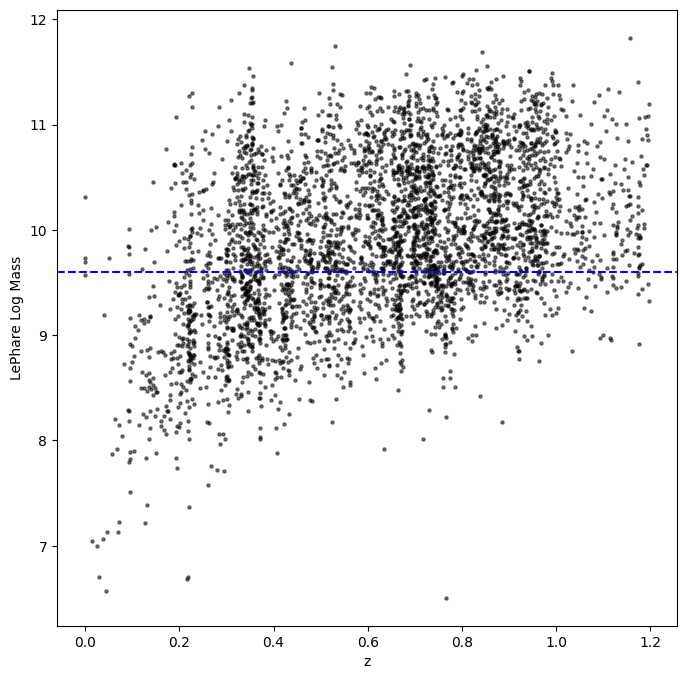

In [10]:
df_z_red.plot.scatter(
    x = 'redshift',
    y = 'lp_mass_best',
    color = 'black',
    s = 5,
    alpha = 0.5,
    xlabel = 'z',
    ylabel = 'LePhare Log Mass',
    figsize = (8,8),
)
plt.axhline(9.6, color = 'blue', linestyle = '--')

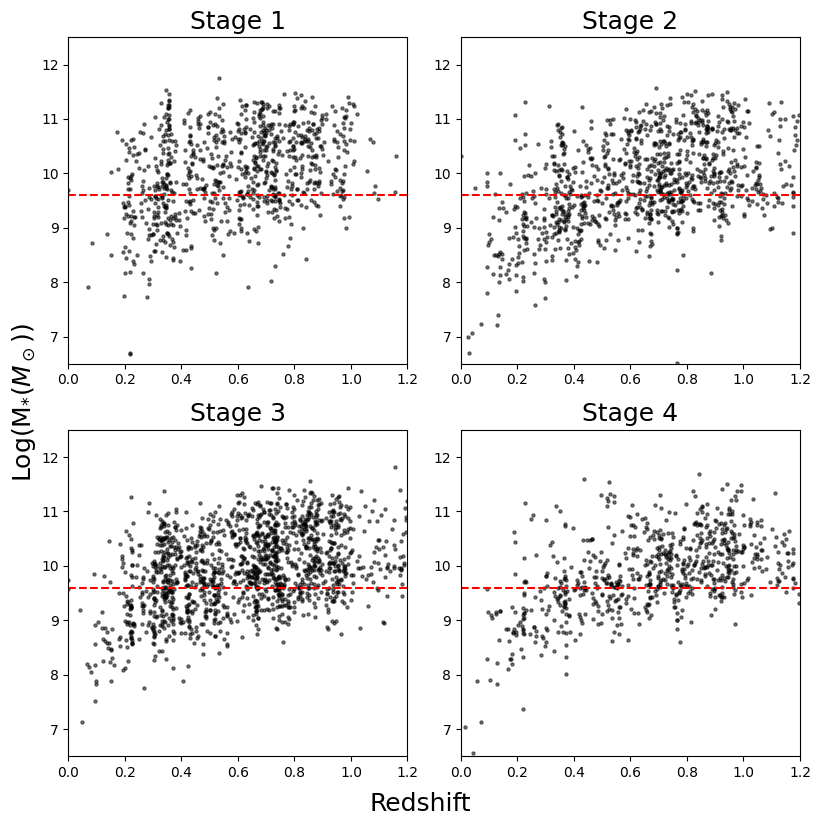

In [22]:
counter = 1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        df_stage = df_z_red.query(f'category == "stage{counter}"')
        df_stage.plot.scatter(
            x = 'redshift',
            y = 'lp_mass_best',
            s = 5,
            alpha = 0.5,
            ax = axes[i,j],
            color = 'black',
            xlim = [0,1.2],
            ylim = [6.5,12.5],
            xlabel = '',
            ylabel = ''
        )
        axes[i,j].set_title(f'Stage {counter}', fontdict={'fontsize' : 18})
        
        axes[i,j].axhline(9.6, color = 'red', linestyle='--')
        
        counter += 1

fig.text(0.43, -0.02, 'Redshift', fontsize = 18)
fig.text(-0.02,0.40, 'Log(M$_{*}(M_\odot)$)', fontsize = 18, rotation = 'vertical')        
fig.tight_layout()
fig.savefig(f'{fig_folder}/stage-selection.pdf', bbox_inches = 'tight')
plt.show()

In [23]:
len(df_z_red)

4142

In [11]:
df_z_tmp = (
    df_z
    .query('redshift >= 0.0 and redshift <= 1.2')
    .query('lp_mass_best >= 9.25 and lp_mass_best <= 12.5')
)
len(df_z_tmp)

3384